# Importing Libraries

In [4]:
# import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
  
# sklearn specific function to obtain R2 calculations  
from sklearn.metrics import r2_score

In [5]:
# Data Reading 
df = pd.read_excel(r"C:\Users\user\Desktop\COVID-19-geographic-disbtribution-worldwide.xlsx") 
df.head() 

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-07-01,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-30,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia


Text(0.5, 0, 'Day Number')

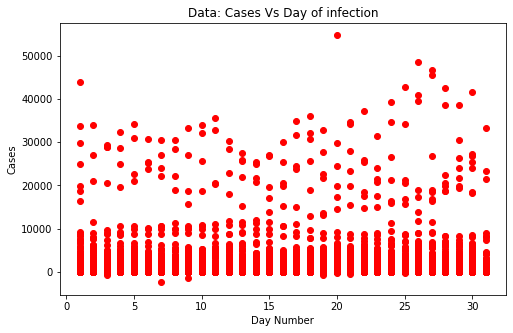

In [7]:
# Initial Data Graphics 
plt.figure(figsize =(8, 5)) 
  
x_data, y_data = (df["day"].values, df["cases"].values) 
  
plt.plot(x_data, y_data, 'ro') 
plt.title('Data: Cases Vs Day of infection') 
plt.ylabel('Cases') 
plt.xlabel('Day Number') 

# Choosing the model

We apply logistic function, a specific case of sigmoid functions, considering that the original curve starts with slow growth remaining nearly flat for a time before increasing, eventually it could descend or maintain its growth in the way of an exponential curve.
The formula for the logistic function is:

Y = 1/(1+e^B1(X-B2))

# Construction of the model

Text(0.5, 0, 'Day Number')

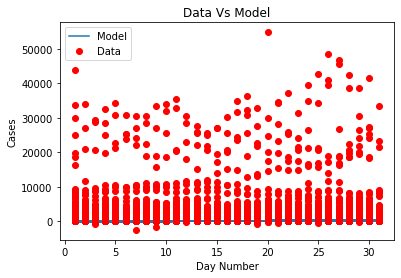

In [8]:
# Definition of the logistic function 
def sigmoid(x, Beta_1, Beta_2): 
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2))) 
     return y 
  
# Choosing initial arbitrary beta parameters 
beta_1 = 0.09
beta_2 = 305
  
# application of the logistic function using beta  
Y_pred = sigmoid(x_data, beta_1, beta_2) 
  
# point prediction 
plt.plot(x_data, Y_pred * 15000000000000., label = "Model") 
plt.plot(x_data, y_data, 'ro', label = "Data") 
plt.title('Data Vs Model') 
plt.legend(loc ='best') 
plt.ylabel('Cases') 
plt.xlabel('Day Number') 

# Data Normalization

Here, variables x and y are normalized assigning them a 0 to 1 range (depending on each case). So both can be interpreted in equal relevance.

In [9]:
xdata = x_data / max(x_data) 
ydata = y_data / max(y_data) 

# Model Fitting:

The objective is to obtain new B optimal parameters, to adjust the model to our data. We use “curve_fit” which uses non-linear least squares to fit the sigmoid function. Being “popt” our optimized parameters.

In [11]:
from scipy.optimize import curve_fit 
popt, pcov = curve_fit(sigmoid, xdata, ydata) 
  
# imprimir los parámetros finales 
print(" beta_1 = % f, beta_2 = % f" % (popt[0], popt[1])) 

 beta_1 =  0.213886, beta_2 =  23.651083


# New Beta values are applied to the model

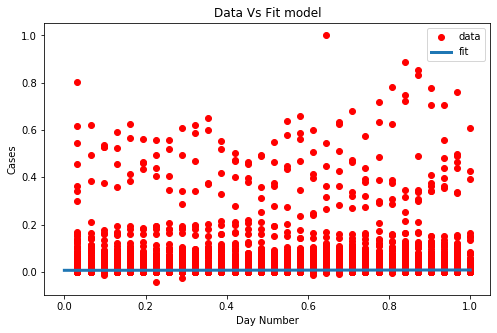

In [13]:
x = np.linspace(0, 40, 4) 
x = x / max(x) 
  
plt.figure(figsize = (8, 5)) 
  
y = sigmoid(x, *popt) 
  
plt.plot(xdata, ydata, 'ro', label ='data') 
plt.plot(x, y, linewidth = 3.0, label ='fit') 
plt.title("Data Vs Fit model") 
plt.legend(loc ='best') 
plt.ylabel('Cases') 
plt.xlabel('Day Number') 
plt.show() 

# Model Evaluation:

The model is ready to be evaluated. The data is split in at 80:20, for training and testing respectively. The data is applied to the model obtaining the corresponding statistical means to evaluate the distance of the resulting data from the regression line.

In [14]:
# Model accuracy calculation 
# Splitting training and testing data 
  
L = np.random.rand(len(df)) < 0.8 # 80 % training data 
train_x = xdata[L] 
test_x = xdata[~L] 
train_y = ydata[L] 
test_y = ydata[~L] 
  
# Construction of the model  
popt, pcov = curve_fit(sigmoid, train_x, train_y) 
  
# Predicting using testing model 
y_predic = sigmoid(test_x, *popt) 
  
# Evaluation 
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(y_predic - test_y))) 
print("Mean Square Error (MSE): %.2f" % np.mean(( test_y - y_predic)**2)) 
print("R2-score: %.2f" % r2_score(y_predic, test_y)) 

Mean Absolute Error: 0.01
Mean Square Error (MSE): 0.00
R2-score: -5556.42
